1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

dataset= 
 [[ 1.44110164  0.15902537 -0.80586337 ... -0.15340935 -0.24843893
   0.51509171]
 [ 1.53921354  0.12961728  3.50209955 ... -2.07316722 -8.27791495
  -0.09148002]
 [ 4.42141682  0.44766802  1.8903728  ... -2.37998593 -8.77479281
   0.9387034 ]]
covariance matrix: [[ 0.95483036  0.9967905   2.90645121]
 [ 0.9967905   9.95069928 11.94428028]
 [ 2.90645121 11.94428028 17.7571827 ]]
eigenvalues: 
 [ 2.67547993e+01 -1.54792955e-15  1.90791305e+00]
eigenvectors 
 [[-0.1132827  -0.81649658  0.56612752]
 [-0.58007907 -0.40824829 -0.70486992]
 [-0.80664447  0.40824829  0.42738511]]
eigenvalues using SVD: 
 [2.67826990e+01 1.90982539e+00 4.43217102e-31]
eigenvectors using SVD: 
 [[-0.11328391  0.56612727 -0.81649658]
 [-0.58007757 -0.70487116 -0.40824829]
 [-0.80664538  0.42738339  0.40824829]]
True

the percentage of the total variablity with 1 eigenvalues is: 0.9334382235901894

the percentage of the total variablity with 2 eigenvalues is: 1.0

the percentage of the total variablity 

(<matplotlib.collections.PathCollection at 0x241f3a45640>,
 Text(0.5, 0, '0'),
 None)

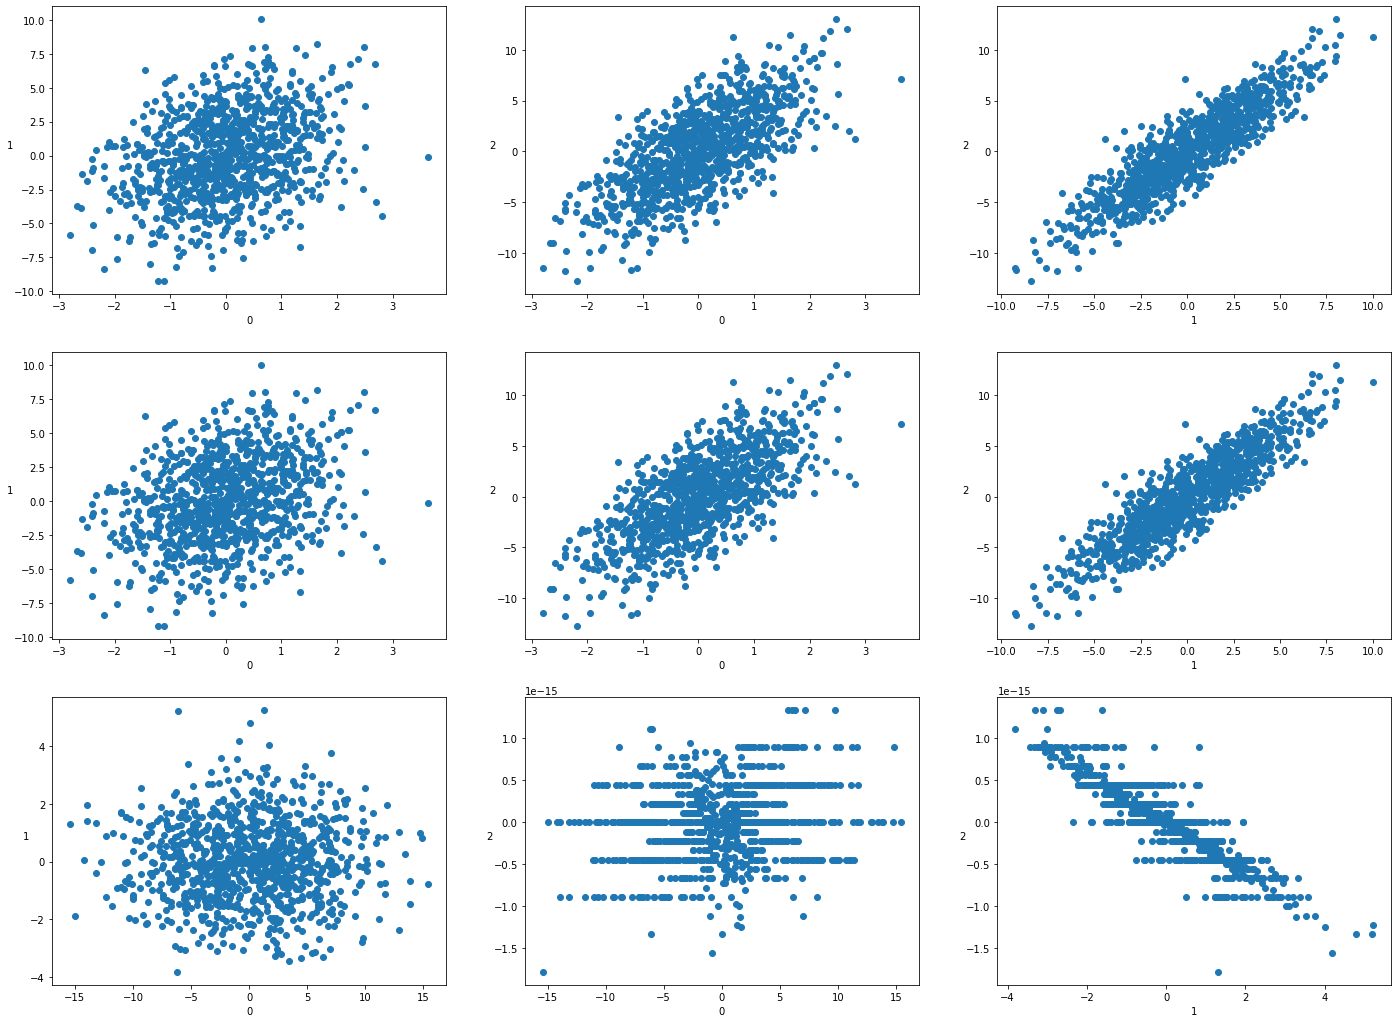

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#x1
mean1=0
std1=1
N=1000
x1 = np.random.normal(mean1, std1, N)
#x2
mean2=0
std2=3
x2=x1+np.random.normal(mean2, std2, N)
#x3
x3=2*x1+x2

#Generate a dataset with 3 features
ds = np.array([x1, x2, x3])
print("dataset=","\n",ds)

#covariance matrix of the dataset
covMatrix=np.cov(ds, bias=True)
print("covariance matrix:", covMatrix)

#eigenvectors and eigenvalues
eigvals, eigvecs = np.linalg.eig(covMatrix)
print ("eigenvalues:","\n", eigvals)
print ("eigenvectors", "\n", eigvecs)

#eigenvectors and eigenvalues using SVD
u, s, vh = np.linalg.svd(ds, full_matrices=True)
eigvals_svd=s**2/(N-1)
eigvecs_svd=u
print("eigenvalues using SVD:","\n", eigvals_svd)
print("eigenvectors using SVD:","\n", eigvecs_svd)
 
eigvals.dot(eigvals.T)

p1 = np.dot(eigvecs_svd.T, ds)
x_red = p1[:2]
v_red = eigvecs_svd[:,:2]
p2 = np.dot(v_red, x_red)
print(np.allclose(ds,p2))

lamb = 0
for i in range(len(eigvals_svd)):
    lamb += eigvals_svd[i]
    print("\nthe percentage of the total variablity with {} eigenvalues is: {}".format(i+1,lamb/eigvals_svd.sum()))


fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(24, 18))
axes[0,0].scatter(ds[0],ds[1],marker='o') , axes[0,0].set_ylabel("1").set_rotation("0") , axes[0,0].set_xlabel("0")

axes[1,1].scatter(p2[0],p2[2],marker='o') , axes[1,1].set_xlabel("0") , axes[1,1].set_ylabel("2").set_rotation("0")

axes[2,2].scatter(p1[1],p1[2],marker='o') , axes[2,2].set_xlabel("1") , axes[2,2].set_ylabel("2").set_rotation("0")

axes[0,1].scatter(ds[0],ds[2],marker='o') , axes[0,1].set_xlabel("0") , axes[0,1].set_ylabel("2").set_rotation("0")

axes[0,2].scatter(ds[1],ds[2],marker='o') , axes[0,2].set_xlabel("1") , axes[0,2].set_ylabel("2").set_rotation("0")

axes[1,0].scatter(p2[0],p2[1],marker='o') , axes[1,0].set_xlabel("0") , axes[1,0].set_ylabel("1").set_rotation("0")

axes[1,2].scatter(p2[1],p2[2],marker='o') , axes[1,2].set_xlabel("1") , axes[1,2].set_ylabel("2").set_rotation("0")

axes[2,0].scatter(p1[0],p1[1],marker='o') , axes[2,0].set_xlabel("0") , axes[2,0].set_ylabel("1").set_rotation("0")

axes[2,1].scatter(p1[0],p1[2],marker='o') , axes[2,1].set_xlabel("0") , axes[2,1].set_ylabel("2").set_rotation("0")

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

(1000, 10)
eigenvalues using SVD: 
 [2.61484775e+01 1.85239326e+00 6.85954767e-04]
eigenvectors using SVD: 
 [[-0.11685092  0.56508563 -0.81671543]
 [-0.57577372 -0.70859318 -0.40789745]
 [-0.80921597  0.42258009  0.40816122]]
False


(<matplotlib.collections.PathCollection at 0x241f3244700>,
 Text(0.5, 0, '0'),
 None)

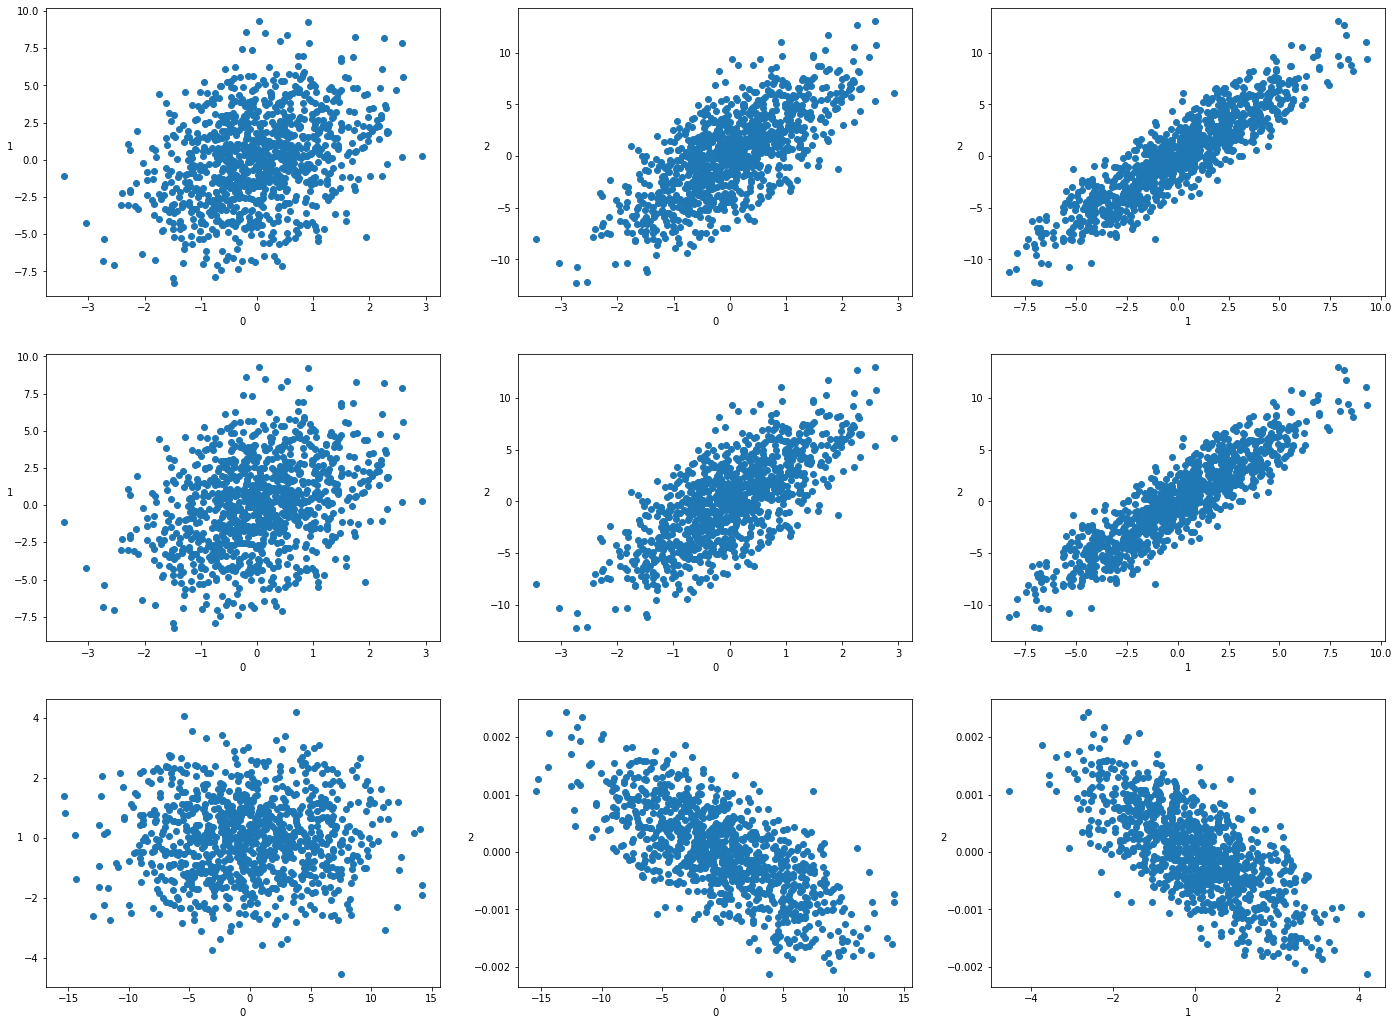

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
N=1000
#noise
mean_n=0
std_n=0.01
noise=np.random.normal(mean_n, std_n, (N, 10))
print(np.shape(noise))
#x1
mean1=0
std1=1
x1 = np.random.normal(mean1, std1, N)
#2
mean2=0
std2=3
x2=x1+np.random.normal(mean2, std2, N)
#x3
x3=2*x1+x2
#Generate a dataset with 3 features
ds = np.array([x1, x2, x3])
#with noise
new_ds=ds + np.sum(noise, axis=1)

u, s, vh = np.linalg.svd(new_ds, full_matrices=True)
eigvals_svd=s**2/(N-1)
eigvecs_svd=u
print("eigenvalues using SVD:","\n", eigvals_svd)
print("eigenvectors using SVD:","\n", eigvecs_svd)

p1 = np.dot(eigvecs_svd.T, ds)
x_red = p1[:2]
v_red = eigvecs_svd[:,:2]
p2 = np.dot(v_red, x_red)
print(np.allclose(ds,p2))

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(24, 18))
axes[0,0].scatter(ds[0],ds[1],marker='o') , axes[0,0].set_ylabel("1").set_rotation("0") , axes[0,0].set_xlabel("0")

axes[1,1].scatter(p2[0],p2[2],marker='o') , axes[1,1].set_xlabel("0") , axes[1,1].set_ylabel("2").set_rotation("0")

axes[2,2].scatter(p1[1],p1[2],marker='o') , axes[2,2].set_xlabel("1") , axes[2,2].set_ylabel("2").set_rotation("0")

axes[0,1].scatter(ds[0],ds[2],marker='o') , axes[0,1].set_xlabel("0") , axes[0,1].set_ylabel("2").set_rotation("0")

axes[0,2].scatter(ds[1],ds[2],marker='o') , axes[0,2].set_xlabel("1") , axes[0,2].set_ylabel("2").set_rotation("0")

axes[1,0].scatter(p2[0],p2[1],marker='o') , axes[1,0].set_xlabel("0") , axes[1,0].set_ylabel("1").set_rotation("0")

axes[1,2].scatter(p2[1],p2[2],marker='o') , axes[1,2].set_xlabel("1") , axes[1,2].set_ylabel("2").set_rotation("0")

axes[2,0].scatter(p1[0],p1[1],marker='o') , axes[2,0].set_xlabel("0") , axes[2,0].set_ylabel("1").set_rotation("0")

axes[2,1].scatter(p1[0],p1[2],marker='o') , axes[2,1].set_xlabel("0") , axes[2,1].set_ylabel("2").set_rotation("0")

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  classes   19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB
None
(19020, 10)
(19020, 1)
(19020, 10)
   principal component 1  principal component 2
0              -1.016550              -0.369256
1              -1.679961              -0.549225
2               5.966242               1.831316
3              -2.557060              -0.031629
4               1.655853              -0.552902
   

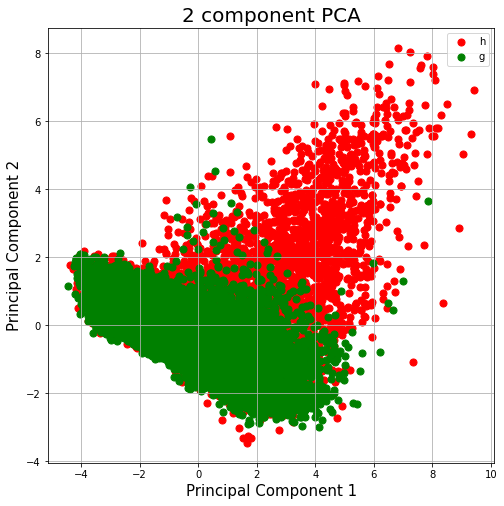

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
df = pd.read_csv(url,names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','classes'])
print(df.info())

features = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']

# Separating out the features
x = df.loc[:, features].values
print(np.shape(x))
# Separating out the class
y = df.loc[:,['classes']].values
# Standardizing the features
print(np.shape(y))
x = StandardScaler().fit_transform(x)
print(np.shape(x))

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf.head())
finalDf = pd.concat([principalDf, df[['classes']]], axis = 1)
print(finalDf.head())


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
classs = ['h', 'g']
colors = ['r', 'g']
for classes, color in zip(classs,colors):
    indicesToKeep = finalDf['classes'] == classes
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
ax.legend(classs)
ax.grid()

